In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 08 : Seaborn

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = """
SELECT 
    uid,
    timestamp,
    numTrials
FROM checker
WHERE 
    uid LIKE 'user_%' 
    AND status = 'ready'
    AND labname = 'project1'
ORDER BY timestamp
"""

df = pd.read_sql(query, conn)
conn.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        951 non-null    object        
 1   timestamp  951 non-null    datetime64[ns]
 2   numTrials  951 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.4+ KB


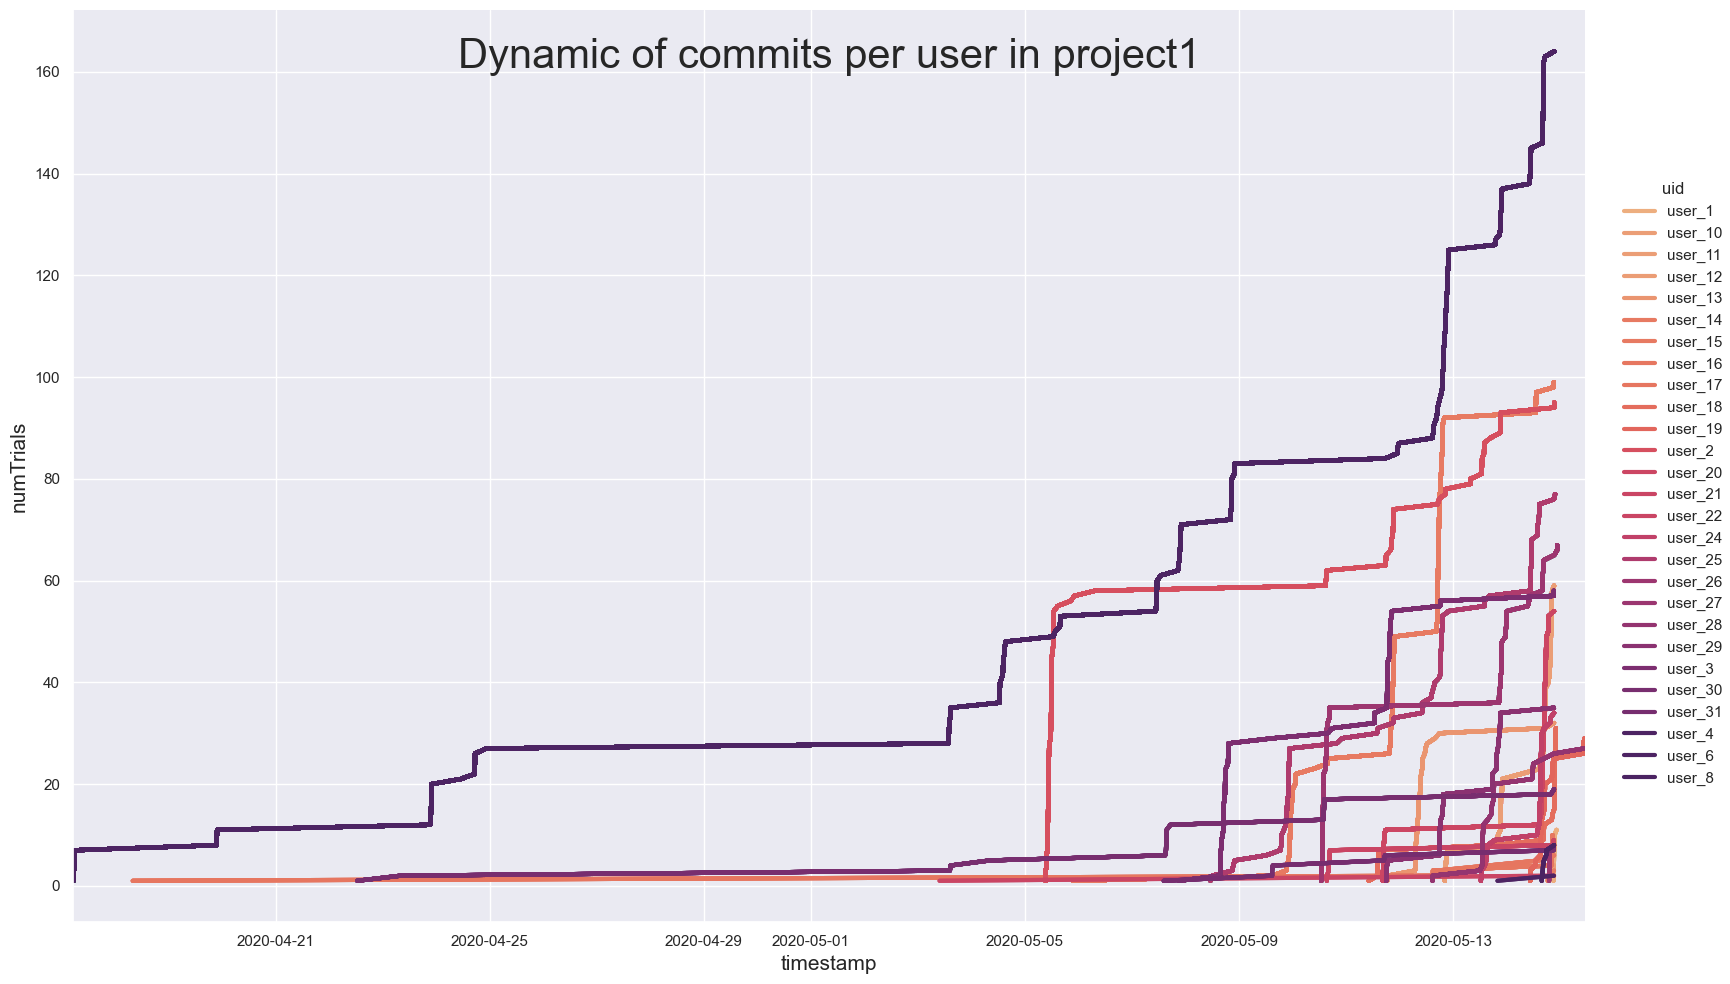

In [4]:
uids_sorted = sorted(df['uid'])

palette = sns.color_palette("flare", n_colors=len(uids_sorted))

sns.set_theme()

g = sns.relplot(
    data=df,
    x='timestamp',
    y='numTrials',
    hue='uid',
    kind='line',
    hue_order=uids_sorted,
    palette=palette,
    height=10,
    aspect=1.5,
    linewidth=3
)

ax = g.ax
ax.text(0.5, 0.97, 'Dynamic of commits per user in project1',
        ha='center', va='top', fontsize=30, transform=ax.transAxes)
ax.set_xlim(df['timestamp'].min(), df['timestamp'].max())
ax.set_xlabel('timestamp', fontsize=15)
ax.set_ylabel('numTrials', fontsize=15)
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_loc('center left')

plt.tight_layout()
plt.show()


Which user was the leader in the number of commits almost all of the time?”
The answer: user_4

Which user was the leader for only a short period of time?” The answer: user_2